# Import Library

In [ ]:
%reset -f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

import os
os.chdir('/content/drive/My Drive/Data/Shopee Code League 2020/C2_Product Detection/train/train')


In [ ]:
train_folders = os.listdir('/content/drive/My Drive/Data/Shopee Code League 2020/C2_Product Detection/train/train/')
print(train_folders)

train_path = '/content/drive/My Drive/Data/Shopee Code League 2020/C2_Product Detection/train/train/'

['32', '40', '27', '38', '39', '35', '20', '22', '23', '24', '34', '33', '09', '03', '01', '04', '08', '07', '02', '05', '00', '06', '11', '10', '18', '14', '15', '19', '17', '12', '13', '16', '26', '21', '25', '29', '28', '30', '31', '37', '36', '41']


# Prepare Traning Data

In [ ]:
filenames_list = []
categories = []
from itertools import repeat

for i in train_folders:
  fname_list = os.listdir(train_path+i)
  filenames_list.extend(fname_list)
  categories.extend(repeat(i.zfill(2),len(fname_list)))

In [ ]:
df_train = pd.DataFrame({
    'filename': filenames_list,
    'category': categories
})
df_train.head()

,filename,category
0,6558226b23c790447b790fe9ee1bf404.jpg,32
1,65f94ab251a40b367cdc1227627701c6.jpg,32
2,641183bad4968355e01e391d05023fc9.jpg,32
3,63de2095b03f23cf0ec85dc6ff907bf3.jpg,32
4,625f589f9b77a8ef49e2c2be56bc79c7.jpg,32


In [ ]:
df_train['fname_full']=df_train['category']+'/'+df_train['filename']

### See Total In count

In [ ]:
#Double check
print(len(os.listdir('/content/drive/My Drive/SCL_2/shopee-product-detection-dataset/train/train/00')))
print(sum(df_train['category']=='00'))

In [ ]:
df_train['category'].value_counts()

In [ ]:
df_train['category'].value_counts().plot.bar(figsize=(10,5))

In [ ]:
dict_label ={}
dict_label[0]='女性衣物'
dict_label[1]='女性長板'
dict_label[2]='女性上衣'
dict_label[3]='女性hoodie'
dict_label[4]='女性牛仔褲'
dict_label[5]='女性飾品'
dict_label[6]='女性耳環'
dict_label[7]='鴨舌帽子'
dict_label[8]='長夾'
dict_label[9]='手提包'

dict_label[10]='手機殼'
dict_label[11]='iphone'
dict_label[12]='時鐘'
dict_label[13]='嬰兒用品(奶瓶)'
dict_label[14]='電鍋'
dict_label[15]='咖啡豆(袋裝產品)'
dict_label[16]='女性平底鞋'
dict_label[17]='女性根鞋'
dict_label[18]='家用電器'
dict_label[19]='USB'

dict_label[20]='椅子'
dict_label[21]='網球拍(狄卡農會賣的東西)'
dict_label[22]='安全帽(腳踏車)'
dict_label[23]='手套'
dict_label[24]='手錶'
dict_label[25]='皮帶'
dict_label[26]='耳塞式耳機'
dict_label[27]='玩具車'
dict_label[28]='男性長袖'
dict_label[29]='男性長褲'

dict_label[30]='運動鞋'
dict_label[31]='包裝甜食'
dict_label[32]='防疫用品'
dict_label[33]='清洗劑類'
dict_label[34]='化妝用品'
dict_label[35]='香水'
dict_label[36]='露營用品'#Not Sure
dict_label[37]='notebook'
dict_label[38]='餐具'
dict_label[39]='家庭裝飾(乾燥花之類的植物)'

dict_label[40]='蓮蓬頭'
dict_label[41]='沙發等大型椅子'

###  VGG Prediction

In [ ]:
img_path = train_path+df_train['fname_full'][1]
print(img_path)

/content/drive/My Drive/SCL_2/shopee-product-detection-dataset/train/train_share/train/01/a0c202321099b202db6198c23f5899de.jpg


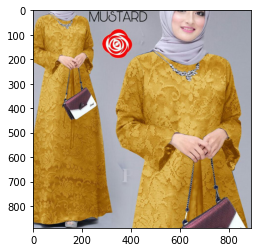

In [ ]:
sample_img = load_img(img_path)
plt.imshow(sample_img)

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print(x.shape)

(224, 224, 3)


In [ ]:
#Sample 1
model = VGG16(weights='imagenet', include_top=True) 

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(features, top=5)[0])

In [ ]:
#https://www.kaggle.com/rupeshwadibhasme/transfer-learning-with-vgg16
#https://www.kaggle.com/niclasdoce/vgg16-transfer-learning-sample

 **Split Train Validation Data**

In [ ]:
#subset
#df_train=df_train[df_train['category'].isin(['00','01','02','03'])]#因為我這邊只先挑三類,會影響後面最後一層N_Dense的數量,記得同步
df_train = df_train.reset_index()

In [ ]:
df_train.head(3)

,index,filename,category,fname_full
0,0,6558226b23c790447b790fe9ee1bf404.jpg,32,32/6558226b23c790447b790fe9ee1bf404.jpg
1,1,65f94ab251a40b367cdc1227627701c6.jpg,32,32/65f94ab251a40b367cdc1227627701c6.jpg
2,2,641183bad4968355e01e391d05023fc9.jpg,32,32/641183bad4968355e01e391d05023fc9.jpg


In [ ]:
df_train['category'].value_counts()

24    2705
30    2705
04    2703
01    2703
03    2703
27    2702
08    2700
09    2698
25    2692
12    2691
02    2687
36    2686
14    2685
26    2684
00    2683
13    2682
40    2681
19    2679
39    2678
31    2677
38    2673
10    2673
16    2665
41    2662
07    2661
35    2658
20    2654
06    2641
05    2641
15    2632
22    2623
34    2599
21    2598
28    2561
23    2540
32    2157
29    2138
18    2104
11    1843
37    1725
17    1553
33     573
Name: category, dtype: int64

In [ ]:
#split train,val dataset
df_train_t, df_train_v = train_test_split(df_train, test_size=0.2)

In [ ]:
df_train_t = df_train_t.reset_index(drop=True)
df_train_v = df_train_v.reset_index(drop=True)

#測試code的時候再用
#df_train_t = df_train_t.sample(n=400).reset_index(drop=True) # use for fast testing code purpose
#df_train_v = df_train_v.sample(n=100).reset_index(drop=True) # use for fast testing code purpose

total_train = df_train_t.shape[0]
total_validate = df_train_v.shape[0]

**VGG16**

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True    

pre_trained_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

#因為我前面
N_Dense = len(df_train['category'].unique())

x = Flatten(name='flattern')(last_output)
x = Dense(512, activation='relu',name='fc1')(x)
x = Dense(512, activation='relu',name='fc2')(x)
x = Dense(N_Dense, activation='sigmoid',name='pred')(x)

In [ ]:
model = Model(pre_trained_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.7),#optimizers.SGD(lr=0.5, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
#training generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train_t, 
    train_path, 
    x_col='fname_full',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="fname_full". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 84313 validated image filenames belonging to 42 classes.


In [ ]:
df_train_t['category'].head(10)

0    14
1    00
2    40
3    39
4    24
5    06
6    05
7    31
8    21
9    07
Name: category, dtype: object

In [ ]:
#validation generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    df_train_v, 
    train_path, 
    x_col='fname_full',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 21079 validated image filenames belonging to 42 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="fname_full". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
# fine-tune the model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/5
1595/5269 [========>.....................] - ETA: 9:37:21 - loss: 12.5788 - accuracy: 0.0259

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator) #, total_validate//batch_size, workers=12)
print("Validation: accuracy = %f  ;  loss = %f " % (accuracy, loss))

In [ ]:
model.save('/content/drive/My Drive/SCL_2/testmodel.h5') 